# Common Labels
The six recordings used for this project were labelled by 4 different experts. The annotation files by each expert have unique identifiers:
* ha_remidx_XXX_XXXXXXn1.txt
* jh_remidx_XXX_XXXXXXn1.txt
* js_remidx_XXX_XXXXXXn1.txt
* 3_remidx_XXX_XXXXXXn1.txt

## Import packages

In [9]:
import os
from preprocess import rempy as rp
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

## Load recordings

In [2]:
# Path containing recordings
ppath = '/workspace/Competition/SLEEP/EEG/data/raw/recordings'

# Load recordings
recordings = os.listdir(ppath)
recordings = [x for x in recordings if not x.startswith('.')]


## Find common annotations

In [3]:
M1 = []
M2 = []
M3 = []
M4 = []

for rec in recordings:
    A1,_ = rp.load_stateidx(ppath, rec, 'sp')
    A2,_ = rp.load_stateidx(ppath, rec, 'ha')
    A3,_ = rp.load_stateidx(ppath, rec, 'jh')
    A4,_ = rp.load_stateidx(ppath, rec, 'js')
    M1.extend(rp.decode(A1))
    M2.extend(rp.decode(A2))
    M3.extend(rp.decode(A3))
    M4.extend(rp.decode(A4))

In [4]:
len(M1), len(M2), len(M3), len(M4)

(70566, 70566, 70566, 70566)

In [6]:
common_cnt = 0

for idx,x in enumerate(M1):
    s1 = x
    s2 = M2[idx]
    s3 = M3[idx]
    s4 = M4[idx]
    if (s1==s2)&(s2==s3)&(s3==s4):
        common_cnt+=1

common_pct = common_cnt / len(M1) * 100
print(f'Percentage of common annotations: {common_pct} %')

Percentage of common annotations: 88.099084544965 %


## Inter-rater agreement

In [10]:
%matplotlib inline

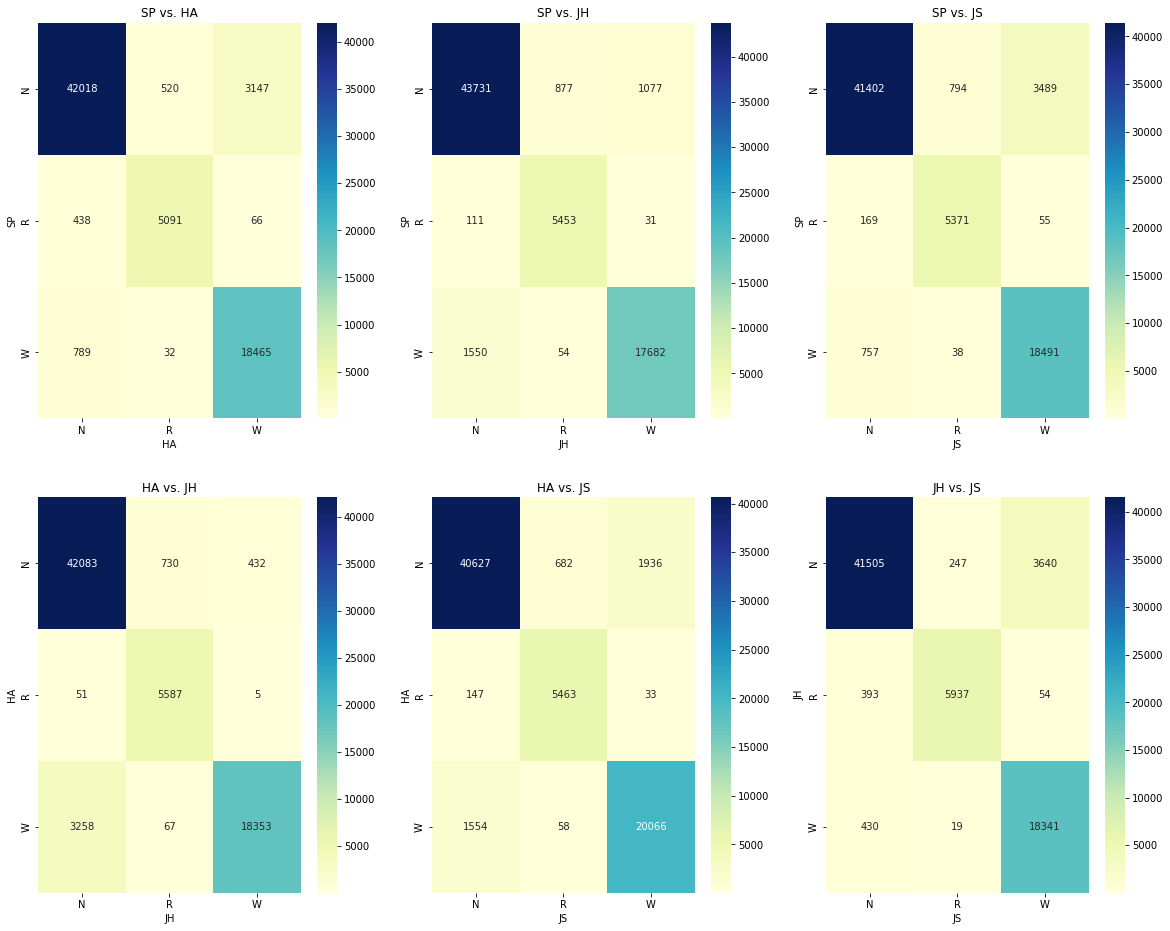

In [19]:
labels = ['N', 'R', 'W']

annotations = [M1,M2,M3,M4]
annotators = ['SP', 'HA', 'JH', 'JS']

subplot_cnt = 1

plt.figure(figsize=(20,16))
for i in range(len(annotations)):
    for j in range(i+1, len(annotations)):
        con_mat = confusion_matrix(annotations[i], annotations[j], labels=labels)
        title = annotators[i] + ' vs. ' + annotators[j]
        plt.subplot(2,3,subplot_cnt)
        plt.title(title)
        sns.heatmap(con_mat, cmap='YlGnBu', xticklabels=labels,yticklabels=labels, annot=True, fmt='.0f')
        plt.xlabel(annotators[j])
        plt.ylabel(annotators[i])
        subplot_cnt+=1


In [21]:
print(f'Agreement between SP and HA is {np.mean(np.array(M1)==np.array(M2))}')
print(f'Agreement between SP and JH is {np.mean(np.array(M1)==np.array(M3))}')
print(f'Agreement between SP and JS is {np.mean(np.array(M1)==np.array(M4))}')
print(f'Agreement between HA and JH is {np.mean(np.array(M2)==np.array(M3))}')
print(f'Agreement between HA and JS is {np.mean(np.array(M2)==np.array(M4))}')
print(f'Agreement between JH and JS is {np.mean(np.array(M3)==np.array(M4))}')

Agreement between SP and HA is 0.9292577161805969
Agreement between SP and JH is 0.9475668168806507
Agreement between SP and JS is 0.9248646657030298
Agreement between HA and JH is 0.9356205538077828
Agreement between HA and JS is 0.9375053141739648
Agreement between JH and JS is 0.9322194824703115
